<a href="https://colab.research.google.com/github/DmitriyDikunov/python-4-7/blob/main/%D0%9B%D0%90%D0%917%D0%94%D1%96%D0%BA%D1%83%D0%BD%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="Target")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Навчальна вибірка: {X_train.shape}, Тестова вибірка: {X_test.shape}')


Навчальна вибірка: (16512, 8), Тестова вибірка: (4128, 8)


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSEна тестовій вибірці: {mse}')
print(f'R^2 на тестовій вибірці: {r2}')


MSEна тестовій вибірці: 0.5558915986952444
R^2 на тестовій вибірці: 0.5757877060324508


In [4]:
y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
print(f'Mean Squared Error (MSE) на навчальній вибірці: {train_mse}')
print(f'R^2 на навчальній вибірці: {train_r2}')
if train_r2 > r2:
    print('Модель може бути перенавчена, так як R^2 на навчальній вибірці вище.')
else:
    print('Модель не демонструє ознак перенавчання.')

Mean Squared Error (MSE) на навчальній вибірці: 0.5179331255246699
R^2 на навчальній вибірці: 0.6125511913966952
Модель може бути перенавчена, так як R^2 на навчальній вибірці вище.


In [5]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
alphas = np.logspace(-4, 4, 100)
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, {'alpha': alphas}, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train, y_train)
lasso = Lasso()
lasso_cv = GridSearchCV(lasso, {'alpha': alphas}, cv=5, scoring='neg_mean_squared_error')
lasso_cv.fit(X_train, y_train)
best_ridge_alpha = ridge_cv.best_params_['alpha']
best_lasso_alpha = lasso_cv.best_params_['alpha']

print(f'Найкраще alpha для Ridge Regression: {best_ridge_alpha}')
print(f'Найкраще alpha для Lasso Regression: {best_lasso_alpha}')


Найкраще alpha для Ridge Regression: 8.497534359086455
Найкраще alpha для Lasso Regression: 0.0004430621457583882


In [6]:
ridge_best = Ridge(alpha=best_ridge_alpha)
ridge_best.fit(X_train, y_train)
y_ridge_pred = ridge_best.predict(X_test)
ridge_mse = mean_squared_error(y_test, y_ridge_pred)
ridge_r2 = r2_score(y_test, y_ridge_pred)
print(f'Mean Squared Error (MSE) для Ridge на тестовій вибірці: {ridge_mse}')
print(f'R^2 для Ridge на тестовій вибірці: {ridge_r2}')
lasso_best = Lasso(alpha=best_lasso_alpha)
lasso_best.fit(X_train, y_train)
y_lasso_pred = lasso_best.predict(X_test)
lasso_mse = mean_squared_error(y_test, y_lasso_pred)
lasso_r2 = r2_score(y_test, y_lasso_pred)
print(f'Mean Squared Error (MSE) для Lasso на тестовій вибірці: {lasso_mse}')
print(f'R^2 для Lasso на тестовій вибірці: {lasso_r2}')


Mean Squared Error (MSE) для Ridge на тестовій вибірці: 0.5551642247253724
R^2 для Ridge на тестовій вибірці: 0.5763427800451826
Mean Squared Error (MSE) для Lasso на тестовій вибірці: 0.5549831512988816
R^2 для Lasso на тестовій вибірці: 0.5764809608952053


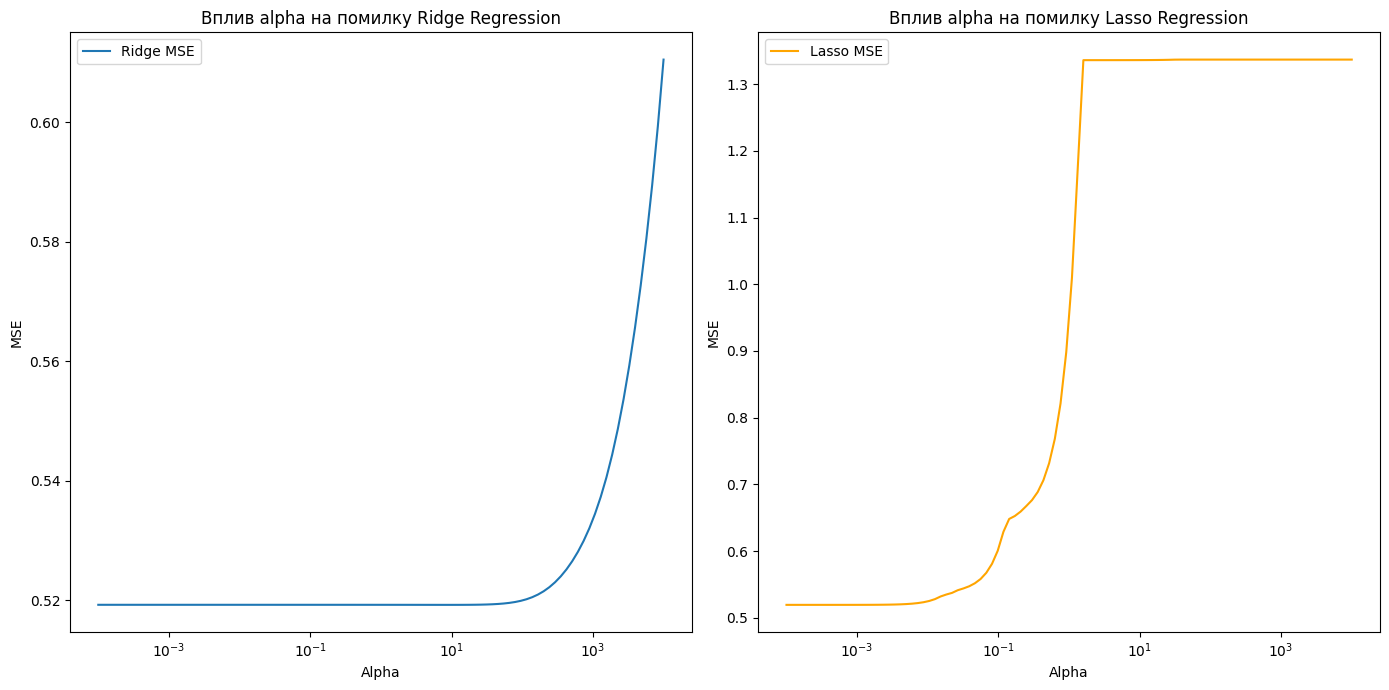

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(alphas, -ridge_cv.cv_results_['mean_test_score'], label='Ridge MSE')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('Вплив alpha на помилку Ridge Regression')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(alphas, -lasso_cv.cv_results_['mean_test_score'], label='Lasso MSE', color='orange')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('Вплив alpha на помилку Lasso Regression')
plt.legend()
plt.tight_layout()
plt.show()


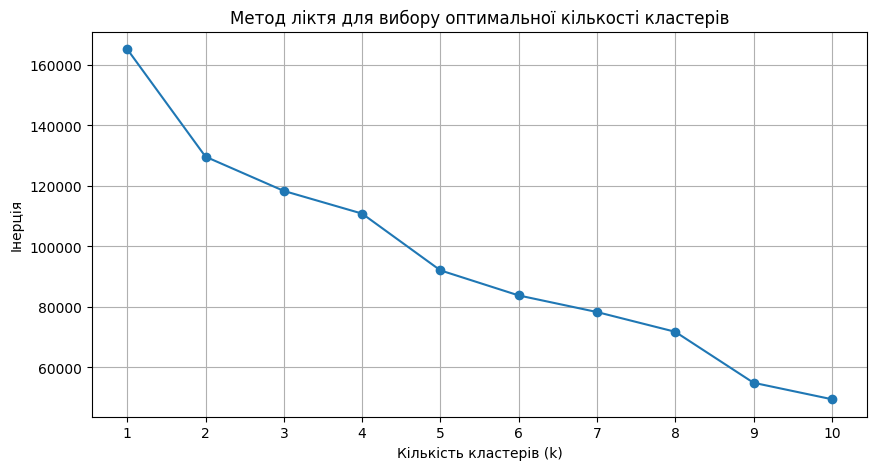

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(K, inertia, marker='o')
plt.xlabel('Кількість кластерів (k)')
plt.ylabel('Інерція')
plt.title('Метод ліктя для вибору оптимальної кількості кластерів')
plt.xticks(K)
plt.grid()
plt.show()


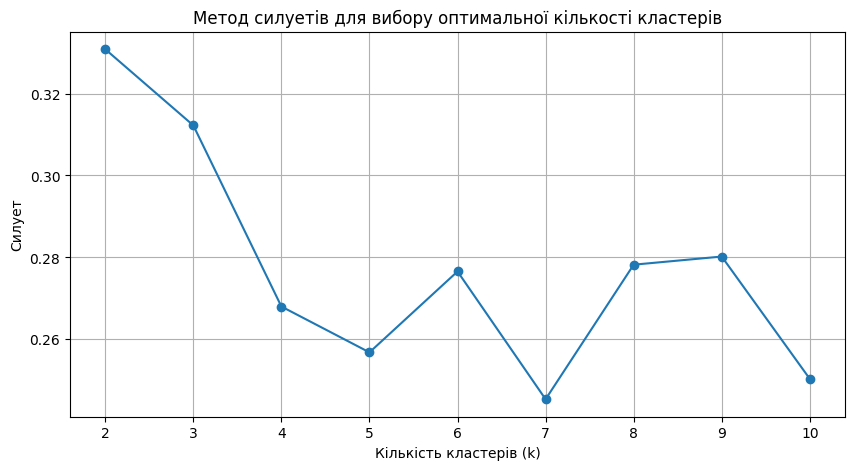

In [9]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 5))
plt.plot(K, silhouette_scores, marker='o')
plt.xlabel('Кількість кластерів (k)')
plt.ylabel('Силует')
plt.title('Метод силуетів для вибору оптимальної кількості кластерів')
plt.xticks(K)
plt.grid()
plt.show()


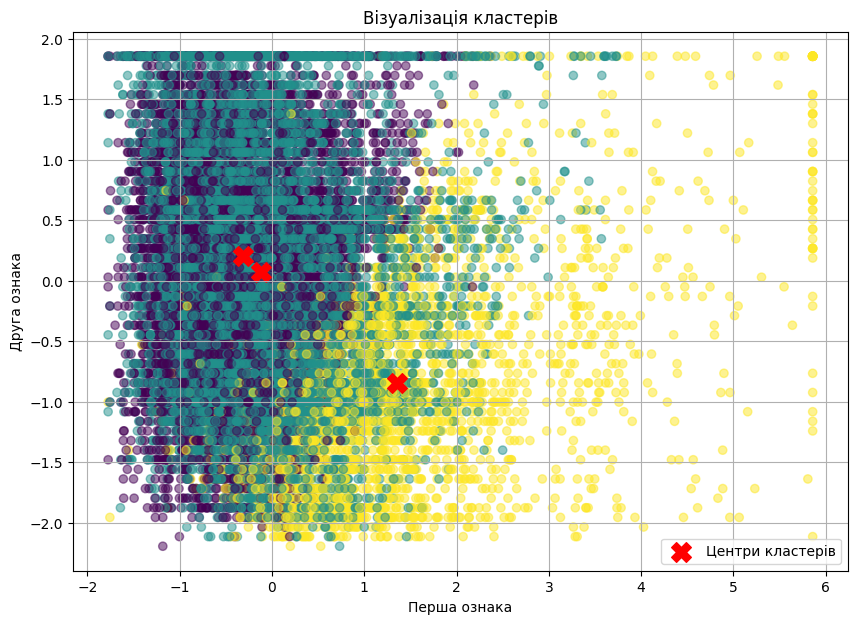

In [10]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)

X['Cluster'] = kmeans.labels_

plt.figure(figsize=(10, 7))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=X['Cluster'], cmap='viridis', marker='o', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Центри кластерів')
plt.xlabel('Перша ознака')
plt.ylabel('Друга ознака')
plt.title('Візуалізація кластерів')
plt.legend()
plt.grid()
plt.show()
